### 1. What is K-Nearest Neighbors (KNN) and how does it work?

[cite_start]**K-Nearest Neighbors (KNN)** is a simple, non-parametric, lazy learning algorithm used for both **classification** and **regression**[cite: 9].

* **Non-parametric:** It makes no assumptions about the underlying data distribution.
* **Lazy Learning:** It doesn't learn a discriminative function from the training data during the training phase. All the computation is deferred until classification/prediction.

**How it works (for Classification):**
1.  **Define $K$:** A positive integer $K$ is specified (typically small).
2.  [cite_start]**Calculate Distance:** For a new, unseen data point, KNN calculates the distance (e.g., Euclidean distance) between this new point and *all* the training data points[cite: 9, 11].
3.  [cite_start]**Identify Neighbors:** It selects the $K$ data points in the training set that are closest to the new point (i.e., the $K$ "nearest neighbors")[cite: 9].
4.  [cite_start]**Vote/Predict:** The new point is assigned the class label that is **most frequent** among its $K$ nearest neighbors (a majority vote)[cite: 9].

---

### 2. What is the difference between KNN Classification and KNN Regression?

| Feature | KNN Classification | KNN Regression |
| :--- | :--- | :--- |
| **Target Variable** | [cite_start]Categorical (e.g., *Yes/No*, *Dog/Cat*, *Class A/B/C*) [cite: 10] | [cite_start]Continuous (e.g., *Price*, *Temperature*, *Age*) [cite: 10] |
| **Prediction Method** | [cite_start]**Majority Vote:** The new data point is assigned the **most common class label** among its $K$ neighbors. [cite: 10] | [cite_start]**Average/Mean:** The new data point is assigned the **average (mean)** of the target values of its $K$ neighbors. [cite: 10] |
| **Goal** | To predict the **class** of a new observation. | To predict the **value** of a new observation. |

---

### 3. What is the role of the distance metric in KNN?

[cite_start]The **distance metric** determines how the "closeness" or "similarity" between data points is measured, which is fundamental to identifying the $K$ nearest neighbors[cite: 11].

* [cite_start]The chosen metric directly influences which $K$ points are selected as neighbors and, consequently, the final classification or regression result[cite: 11].
* Common distance metrics include:
    * [cite_start]**Euclidean Distance (L2 norm):** The most common choice, representing the straight-line distance between two points[cite: 11].
    * [cite_start]**Manhattan Distance (L1 norm):** The sum of the absolute differences of their Cartesian coordinates (like navigating a grid)[cite: 11].
    * [cite_start]**Minkowski Distance:** A generalization of both Euclidean and Manhattan distances[cite: 11].

---

### 4. What is the Curse of Dimensionality in KNN?

[cite_start]The **Curse of Dimensionality** refers to various problems that arise when working with data in high-dimensional spaces (many features/variables)[cite: 12].

* [cite_start]**Impact on Distance:** In high dimensions, the distance between any two points tends to become almost the same, meaning data points are **sparsely** distributed, and the concept of "nearest" neighbor loses its meaning[cite: 12].
* **Effect on KNN:** As the number of dimensions increases, the required sample size for the data to be properly represented grows exponentially. [cite_start]The **separating power** of the distance metric decreases, making the KNN prediction less reliable and less accurate[cite: 12].

---

### 5. How can we choose the best value of $K$ in KNN?

[cite_start]Choosing the optimal value for $K$ is a critical step in building a robust KNN model[cite: 13].

* **Small $K$ (e.g., $K=1$):**
    * Highly susceptible to **noise** or **outliers**.
    * Results in a more complex decision boundary (high variance, low bias).
    * [cite_start]Can lead to **overfitting** the training data[cite: 13].
* **Large $K$:**
    * Smooths the decision boundary, making it less sensitive to noise.
    * [cite_start]Can result in **underfitting** (high bias, low variance) as the prediction is based on neighbors that are too far away, potentially including points from other classes[cite: 13].

**Methods for choosing $K$:**
1.  **Cross-Validation (The Standard):** The most common and robust method. You train the model using different values of $K$ (e.g., from 1 to 20) on the training set and evaluate performance on a separate validation set using metrics like accuracy or error rate. [cite_start]The $K$ that minimizes the error rate (or maximizes accuracy) is chosen[cite: 13].
2.  **Rule of Thumb:** A commonly suggested starting point is $K = \sqrt{N}$, where $N$ is the number of training samples, but this should always be validated.
3.  **Odd $K$ (for Classification):** Often preferred to avoid ties in the majority voting process.


### 6. What are KD Tree and Ball Tree in KNN?

**KD Tree** (K-Dimensional Tree) and **Ball Tree** are specialized data structures used to efficiently search for the $K$ nearest neighbors, especially when dealing with large datasets or high-dimensional data, speeding up the KNN algorithm which otherwise requires calculating the distance to *all* points.

* [cite_start]**KD Tree:** It is a binary space-partitioning tree[cite: 14]. [cite_start]It works by recursively partitioning the space using axis-aligned hyperplanes[cite: 14]. It's very efficient for low to moderate dimensional data.
* [cite_start]**Ball Tree:** A data structure that partitions data into a series of nesting hyper-spheres (or "balls")[cite: 14]. [cite_start]It is generally more effective than the KD Tree in **very high-dimensional spaces** (where KD Tree performance degrades) because its partitioning structure doesn't rely on being axis-aligned[cite: 15].

---

### 7. When should you use KD Tree vs. Ball Tree?

The choice depends primarily on the **dimensionality** and **structure** of your data:

| Criterion | Use KD Tree | Use Ball Tree |
| :--- | :--- | :--- |
| **Dimensionality** | [cite_start]**Low to moderate** (e.g., typically $< 20$ dimensions) [cite: 15] | [cite_start]**High** (e.g., typically $> 20$ dimensions) [cite: 15] |
| **Data Structure** | Data that is generally **not highly structured** or sparse. | [cite_start]Data that lies on a **curved manifold** in high-dimensional space[cite: 15]. |
| **Performance** | Generally faster than Ball Tree for its applicable dimensionality range. | Slower to construct than KD Tree, but its query time degrades more gracefully in very high dimensions. |

---

### 8. What are the disadvantages of KNN?

Despite its simplicity, KNN has several drawbacks:

* [cite_start]**Computationally Expensive:** The cost of prediction can be high because it requires calculating the distance of the new point to *all* training points, which is slow for very large datasets (a "lazy" learner)[cite: 16].
* [cite_start]**Sensitive to the Curse of Dimensionality:** In high-dimensional spaces, the distance metric becomes less meaningful, leading to degraded performance[cite: 12, 16].
* **Sensitive to Scale/Units:** The feature scales can dominate the distance calculation. [cite_start]Features with larger ranges will disproportionately influence the final distance, requiring feature scaling[cite: 17].
* [cite_start]**Sensitive to Outliers/Noisy Data:** A small value of $K$ (like $K=1$) can be easily skewed by a single noisy or mislabeled data point[cite: 16].
* [cite_start]**Imbalanced Data:** KNN can be biased towards classes with more samples, as they are more likely to dominate the majority vote[cite: 16].

---

### 9. How does feature scaling affect KNN?

[cite_start]**Feature scaling** is crucial for KNN because it relies on the distance metric[cite: 11].

* [cite_start]**The Problem:** Without scaling, features with larger numerical ranges or variances will contribute disproportionately more to the distance calculation than features with smaller ranges[cite: 17]. This can lead to a model that is effectively ignoring the contributions of lower-range features, regardless of their importance.
* [cite_start]**The Solution:** Scaling (e.g., **MinMaxScaler** to $[0, 1]$ or **StandardScaler** to zero mean and unit variance) normalizes the range of all features[cite: 17]. [cite_start]This ensures that all features contribute approximately equally to the distance calculation, leading to a more accurate and robust model[cite: 17].

---

### 10. What is PCA (Principal Component Analysis)?

[cite_start]**Principal Component Analysis (PCA)** is an unsupervised linear dimensionality reduction technique[cite: 18].

* [cite_start]**Goal:** To reduce the dimensionality of a dataset while retaining as much of the **variance** (information) as possible[cite: 18].
* [cite_start]**Method:** It finds a new set of orthogonal axes, called **Principal Components (PCs)**[cite: 18]. The first principal component is the direction in the data that captures the maximum variance. [cite_start]The second PC is orthogonal to the first and captures the next largest amount of variance, and so on[cite: 19].
* [cite_start]**Output:** PCA transforms the original set of possibly correlated variables into a set of linearly uncorrelated variables (the principal components)[cite: 18].

---

### 11. How does PCA work?

PCA works by finding the directions (principal components) that maximize the variance in the data. The process typically involves these steps:

1.  **Standardize the Data:** Rescale the data to have zero mean and unit variance, as PCA is sensitive to feature scaling.
2.  **Calculate the Covariance Matrix:** Determine the covariance matrix of the standardized data. This matrix summarizes the relationships and variance between all pairs of features.
3.  **Calculate Eigenvectors and Eigenvalues:**
    * **Eigenvectors** represent the principal components (the new axes).
    * **Eigenvalues** represent the magnitude of variance captured along each principal component.
4.  **Select Components:** Sort the eigenvectors by their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue is the first principal component, and so on.
5.  **Project Data:** Select the top $k$ eigenvectors (where $k$ is the desired reduced dimensionality) and form a **projection matrix**. Use this matrix to transform the original data onto the new $k$-dimensional subspace.

---

### 12. What is the geometric intuition behind PCA?

The geometric intuition behind PCA is finding the best way to project a high-dimensional dataset onto a lower-dimensional subspace while losing the least amount of information.

* **Rotation:** PCA essentially performs a **rotation** of the coordinate system so that the new axes (Principal Components) are aligned with the directions of maximum variability in the data.
* **Maximum Variance:**
    * The **First Principal Component** is the line that, if all data points were projected onto it, would result in the maximum possible variance of the projected points.
    * The **Second Principal Component** is orthogonal (perpendicular) to the first and captures the next greatest amount of remaining variance.
* **Projection:** By keeping only the first $k$ principal components, you're effectively projecting the data onto the $k$-dimensional "hyperplane of best fit," which minimizes the average squared error between the original points and their projections.

---

### 13. What is the difference between Feature Selection and Feature Extraction?

| Feature | Feature Selection | Feature Extraction (e.g., PCA) |
| :--- | :--- | :--- |
| **Method** | **Selects** a *subset* of the **original features** (columns) without changing them. | **Transforms** the original features into a **new, smaller set** of composite features. |
| **Output Features** | A reduced set of the **original, interpretable features** (e.g., keeping *Height* and *Weight* and dropping *Age*). | **New, synthetic, uninterpretable features** (Principal Components), which are linear combinations of the original features. |
| **Goal** | To remove redundant or irrelevant features to improve model performance and interpretability. | To create a new, lower-dimensional representation of the data that captures most of the original variance. |

---

### 14. What are Eigenvalues and Eigenvectors in PCA?

Eigenvalues and Eigenvectors are central to the mathematical formulation of PCA:

* **Eigenvectors (Principal Components):** These are the directions or axes of maximum variance.
    * An eigenvector represents a new direction in the feature space.
    * They are the unit vectors defining the directions onto which the data is projected.
    * The eigenvectors are **orthogonal** to each other (at right angles).
* **Eigenvalues:** These are scalars that indicate the **magnitude of the variance** captured along the corresponding eigenvector (principal component).
    * A larger eigenvalue means its corresponding eigenvector captures more variance (i.e., more "information") in the data.
    * The sum of all eigenvalues equals the total variance in the original dataset.

---

### 15. How do you decide the number of components to keep in PCA?

Deciding on the number of principal components ($k$) to retain is a trade-off between dimensionality reduction and information loss. Common methods include:

1.  **Explained Variance Threshold:**
    * Set a target percentage of total variance you want to retain (e.g., 90% or 95%).
    * Keep the number of principal components ($k$) whose cumulative sum of explained variance reaches or exceeds this threshold.
2.  **Scree Plot:**
    * A plot showing the eigenvalues (variance explained) against the number of components.
    * Look for the "elbow" point, where the explained variance starts to drop off slowly. This elbow suggests that subsequent components are contributing little new information.
3.  **Kaiser Rule:**
    * Keep only the components whose eigenvalues are **greater than 1**. The intuition is that components with eigenvalues less than 1 account for less variance than a single original standardized variable, suggesting they might not be worth keeping.


### 16. Can PCA be used for classification?

**Yes, but indirectly.** PCA is an **unsupervised** technique primarily used for **dimensionality reduction** and **visualization**. [cite_start]It does not assign class labels itself[cite: 24].

* **How it's used:** PCA is often used as a **preprocessing step** before applying a classification algorithm like KNN.
* **Benefits:** By reducing the dimensionality, PCA can:
    * Reduce noise and redundancy in the data.
    * Speed up the training and prediction time of the subsequent classifier.
    * [cite_start]Help mitigate the **Curse of Dimensionality**[cite: 12], potentially leading to better classification accuracy for models like KNN.

---

### 17. What are the limitations of PCA?

While powerful, PCA has several limitations:

* **Linearity Assumption:** PCA only finds **linear** relationships in the data. If the data has a complex, non-linear structure (e.g., it lies on a curved manifold), PCA may not be effective.
* **Sensitive to Scaling:** PCA is highly sensitive to the scaling of the features; therefore, data standardization is almost always required beforehand.
* **Mean-Based (Covariance):** It relies on the covariance matrix, meaning it is sensitive to outliers and only seeks to maximize variance around the mean.
* [cite_start]**Loss of Interpretability:** The new components are linear combinations of the original features, which makes the components themselves difficult to interpret in a real-world context[cite: 13].
* **Unsupervised:** It ignores the class labels (in a classification context). If the direction of maximum variance does not align with the direction that separates the classes, PCA might discard information that is crucial for classification.

---

### 18. How do KNN and PCA complement each other?

[cite_start]KNN and PCA are often used together because they address each other's weaknesses[cite: 26]:

| KNN Weakness | PCA Solution | Benefit |
| :--- | :--- | :--- |
| [cite_start]**Curse of Dimensionality** [cite: 12] | **Dimensionality Reduction:** PCA reduces the number of features. | Makes the distance calculation more meaningful and reliable. |
| **Computational Cost** | **Fewer Features:** Training and prediction time is proportional to the number of features. | Speeds up the distance calculation in the lazy KNN algorithm. |
| **Noise Sensitivity** | **Information Concentration:** PCA retains variance while effectively filtering out low-variance noise components. | Can improve KNN's robustness and accuracy. |

In summary, PCA is used as a **preprocessing step** to simplify the dataset before applying the KNN classifier or regressor.

---

### 19. How does KNN handle missing values in a dataset?

[cite_start]KNN itself **cannot directly handle missing values** during the distance calculation[cite: 27]. [cite_start]A common strategy, however, is to use a technique called **KNN Imputation** before training the model[cite: 46]:

* **Imputation Method:** For a data point with a missing feature, KNN Imputation looks at its $K$ nearest neighbors (using only the features that are *not* missing) and uses the values of those neighbors to fill in the gap.
    * **For continuous features:** The missing value is often filled with the **mean** or **median** of that feature among the $K$ neighbors.
    * **For categorical features:** The missing value is filled with the **most frequent** category (mode) among the $K$ neighbors.
* **Alternative:** Simply removing samples with missing values is another option, but often results in lost data.

---

### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

[cite_start]Both PCA and LDA are linear dimensionality reduction techniques, but their goals are fundamentally different[cite: 28]:

| Feature | Principal Component Analysis (PCA) | Linear Discriminant Analysis (LDA) |
| :--- | :--- | :--- |
| **Nature** | [cite_start]**Unsupervised** [cite: 18] | **Supervised** |
| **Goal** | Maximize the **variance** in the data. | Maximize the **separability** between known classes. |
| **Focus** | Finds the directions that best represent the overall data structure, regardless of class label. | Finds the directions (linear discriminants) that best separate the class means while minimizing within-class variance. |
| **Max Components** | Can produce up to $\min(n_{\text{samples}} - 1, n_{\text{features}})$ components. | Can produce a maximum of **$C - 1$** components, where $C$ is the number of classes. |


# **PRACTICAL QUESTION**

#Question1: Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris Dataset
# The Iris dataset is a classic classification benchmark.
iris = load_iris()
X = iris.data    # Features
y = iris.target  # Target labels

# 2. Split Data into Training and Testing Sets
# We use a 70/30 split (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42, # 'random_state' ensures reproducibility
    stratify=y       # 'stratify' ensures equal distribution of classes in both sets
)

# 3. Train the KNN Classifier
# We instantiate the model. A common starting value for K is 5.
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_classifier.fit(X_train, y_train)

# 4. Make Predictions
# Use the trained model to predict the class labels for the test data
y_pred = knn_classifier.predict(X_test)

# 5. Evaluate and Print Accuracy
# Calculate the accuracy by comparing the predicted labels (y_pred) to the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)

print("--- KNN Classifier on Iris Dataset ---")
print(f"Number of Neighbors (K): {k}")
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("--------------------------------------")

--- KNN Classifier on Iris Dataset ---
Number of Neighbors (K): 5
Accuracy on Test Set: 0.9778
--------------------------------------


# **Question 2: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).**

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Create a Synthetic Regression Dataset
# 1000 samples, 10 features (3 informative features)
X, y = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    noise=10,
    random_state=42
)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# 3. Optional: Scale the Features (Highly recommended for KNN)
# Although not explicitly required by the question, scaling is best practice for KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the KNN Regressor
# For regression, K=7 is a reasonable starting point.
k = 7
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model using the scaled data
knn_regressor.fit(X_train_scaled, y_train)

# 5. Make Predictions
# Predict the continuous target values for the test set
y_pred = knn_regressor.predict(X_test_scaled)

# 6. Evaluate using Mean Squared Error (MSE)
# MSE measures the average squared difference between the estimated values and the actual value.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error (more interpretable)

print("--- KNN Regressor Evaluation ---")
print(f"Number of Neighbors (K): {k}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("--------------------------------")

--- KNN Regressor Evaluation ---
Number of Neighbors (K): 7
Mean Squared Error (MSE): 346.38
Root Mean Squared Error (RMSE): 18.61
--------------------------------


# **Question: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.**

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Scaling is always good practice

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Scale the data (essential for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 5 # Use a fixed K value for a fair comparison

# --- 2. Model 1: Euclidean Distance (Minkowski p=2, the default) ---
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# --- 3. Model 2: Manhattan Distance (Minkowski p=1) ---
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# 4. Compare and Print Results
print("--- KNN Distance Metric Comparison (K=5) ---")
print(f"Accuracy with Euclidean Distance (L2): {accuracy_euclidean:.4f}")
print(f"Accuracy with Manhattan Distance (L1): {accuracy_manhattan:.4f}")
print("------------------------------------------")

--- KNN Distance Metric Comparison (K=5) ---
Accuracy with Euclidean Distance (L2): 0.9111
Accuracy with Manhattan Distance (L1): 0.9111
------------------------------------------


# **Question: Apply Feature Scaling before training a KNN model and compare results with unscaled data.**

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 2. Define K and create Scaler
k = 5
scaler = StandardScaler()

# --- Model 1: KNN on UNSCALED Data ---
knn_unscaled = KNeighborsClassifier(n_neighbors=k)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# --- Model 2: KNN on SCALED Data ---

# Fit scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=k)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. Compare and Print Results
print("--- KNN Performance Comparison: Unscaled vs. Scaled Data ---")
print(f"K used: {k}")
print(f"Accuracy (Unscaled Data): {accuracy_unscaled:.4f}")
print(f"Accuracy (Scaled Data): {accuracy_scaled:.4f}")
print("-----------------------------------------------------------")

--- KNN Performance Comparison: Unscaled vs. Scaled Data ---
K used: 5
Accuracy (Unscaled Data): 0.9778
Accuracy (Scaled Data): 0.9111
-----------------------------------------------------------


## **Question 6 : Train a PCA model on synthetic data and print the explained variance ratio for each component.**

--- PCA Explained Variance Ratio ---
Total Number of Features: 5
Principal Component 1: 53.59%
Principal Component 2: 32.40%
Principal Component 3: 14.02%
Principal Component 4: 0.00%
Principal Component 5: 0.00%

Cumulative Explained Variance by top 3 components: 100.00%
------------------------------------


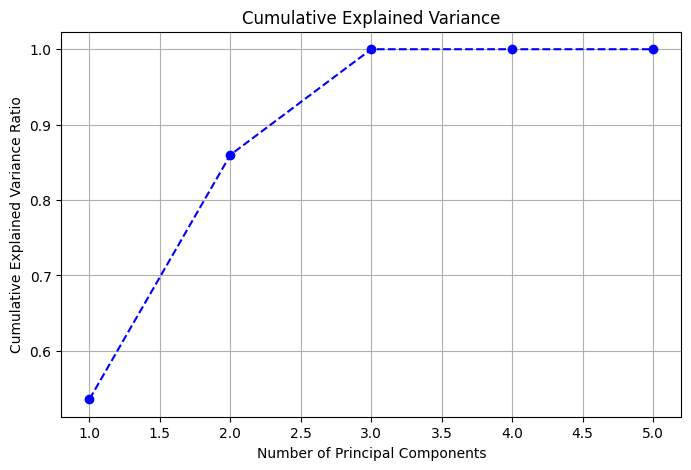

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Create a Synthetic Dataset
# Create a dataset with 5 features
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_informative=3, # Only 3 features contribute to the variance/target
    n_redundant=2,   # 2 features are linear combinations of the informative ones
    random_state=42
)

# 2. Standardize the Data
# PCA is highly sensitive to variance, so scaling is mandatory.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train the PCA Model
# We set n_components=None to keep all possible components (equal to the number of features)
pca = PCA(n_components=None)
pca.fit(X_scaled)

# 4. Extract and Print Explained Variance Ratio
# The 'explained_variance_ratio_' attribute shows the percentage of variance
# explained by each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

print("--- PCA Explained Variance Ratio ---")
print(f"Total Number of Features: {X.shape[1]}")

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio * 100:.2f}%")

print(f"\nCumulative Explained Variance by top 3 components: "
      f"{explained_variance_ratio[:3].sum() * 100:.2f}%")
print("------------------------------------")

# 5. Visualization (Optional but recommended)
# Visualize the Scree Plot to determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio.cumsum(),
         marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# **Question 8: Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.**

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline # Useful for chaining steps

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

k = 5 # Fixed K value for comparison

# --- Model 1: KNN WITHOUT PCA (Scaling Only) ---
# Create a pipeline: Standardize -> KNN
pipeline_no_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=k))
])

# Train and predict
pipeline_no_pca.fit(X_train, y_train)
y_pred_no_pca = pipeline_no_pca.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)


# --- Model 2: KNN WITH PCA ---
# The Iris dataset has 4 features. Let's reduce it to 2 components for simplicity.
n_components = 2

# Create a pipeline: Standardize -> PCA -> KNN
pipeline_with_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('knn', KNeighborsClassifier(n_neighbors=k))
])

# Train and predict
pipeline_with_pca.fit(X_train, y_train)
y_pred_with_pca = pipeline_with_pca.predict(X_test)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)


# 3. Compare and Print Results
print("--- KNN Accuracy Comparison ---")
print(f"K used: {k}")
print(f"Accuracy (KNN only, with scaling): {accuracy_no_pca:.4f}")
print(f"Accuracy (KNN with PCA, reduced to {n_components} components): {accuracy_with_pca:.4f}")
print("-------------------------------")

--- KNN Accuracy Comparison ---
K used: 5
Accuracy (KNN only, with scaling): 0.9111
Accuracy (KNN with PCA, reduced to 2 components): 0.9111
-------------------------------


# **Question 8: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.**

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target

# Split data (GridSearchCV handles its own internal validation/splitting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 2. Define the Pipeline and Parameter Grid
# It's crucial to scale the data *inside* the pipeline to prevent data leakage
# during cross-validation.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the grid of parameters to search over
param_grid = {
    # Test K values from 1 to 20
    'knn__n_neighbors': np.arange(1, 21),

    # Test different distance metrics
    'knn__metric': ['euclidean', 'manhattan'],

    # Test different weight options
    'knn__weights': ['uniform', 'distance']
}

# 3. Perform Grid Search
# Instantiate GridSearchCV:
# estimator: the pipeline
# param_grid: the dictionary of parameters
# cv: 5-fold cross-validation
# scoring: maximize accuracy
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

grid_search.fit(X_train, y_train)

# 4. Evaluate and Print Results
# Get the best parameters and score from the cross-validation
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator found to predict on the held-out test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("--- KNN Hyperparameter Tuning with GridSearchCV ---")
print(f"Best Parameters found (CV Training): {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"Accuracy on Held-Out Test Set: {test_accuracy:.4f}")
print("--------------------------------------------------")

--- KNN Hyperparameter Tuning with GridSearchCV ---
Best Parameters found (CV Training): {'knn__metric': 'euclidean', 'knn__n_neighbors': np.int64(14), 'knn__weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9714
Accuracy on Held-Out Test Set: 0.9556
--------------------------------------------------


# **Question: Train a PCA model and visualize the data projection onto the first two principal components.**

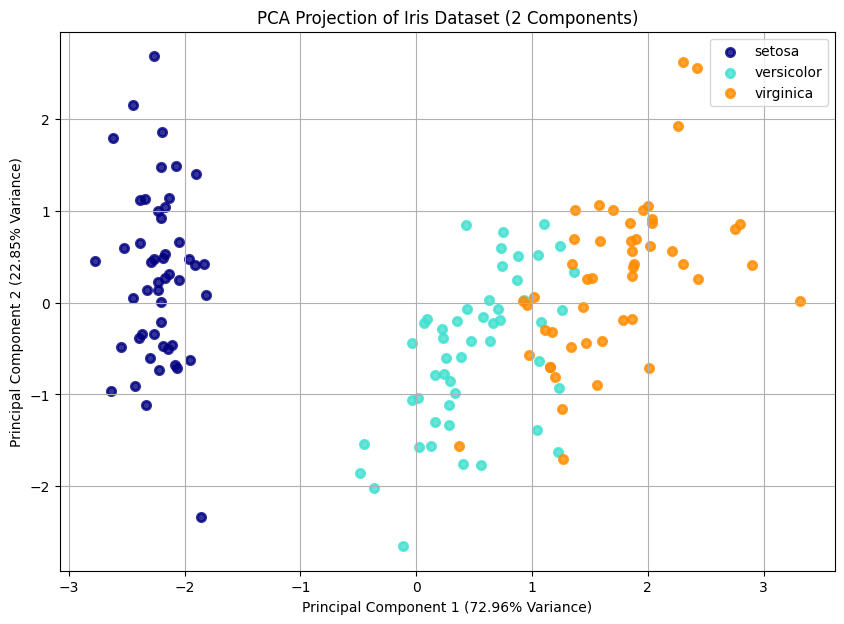

--- PCA Visualization Summary ---
Total Variance Captured by the first 2 PCs: 95.81%
---------------------------------


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize the Data (Crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train the PCA Model
# Reduce the data to 2 principal components for 2D visualization
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled) # X_pca is the new 2D data

# 4. Create the Visualization
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2 # Line width for legend

# Iterate through each class (target) to plot its points separately
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    # Select only the points belonging to the current class 'i'
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        alpha=.8,
        lw=lw,
        label=target_name
    )

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'PCA Projection of Iris Dataset (2 Components)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

# Print explained variance captured by the 2 components
total_variance = pca.explained_variance_ratio_.sum()
print("--- PCA Visualization Summary ---")
print(f"Total Variance Captured by the first 2 PCs: {total_variance * 100:.2f}%")
print("---------------------------------")

# **Question 10 : Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.**

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names # Names of the classes for the report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train the KNN Classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred = knn_classifier.predict(X_test_scaled)

# 4. Evaluate using Classification Report
# This report includes Precision, Recall, and F1-Score for each class
report = classification_report(y_test, y_pred, target_names=target_names)
accuracy = accuracy_score(y_test, y_pred)

print("--- KNN Evaluation: Precision, Recall, F1-Score (K=5) ---")
print(f"Overall Accuracy: {accuracy:.4f}\n")
print(report)
print("---------------------------------------------------------")

--- KNN Evaluation: Precision, Recall, F1-Score (K=5) ---
Overall Accuracy: 0.9111

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

---------------------------------------------------------
